In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as data

In [ ]:
import io
import pandas
from datetime import datetime
import requests

class YahooData:
  def fetch(ticker, start, end):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'
    }

    url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
    x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
    y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
    url += "?period1=" + str(x) + "&period2=" + str(y) + "&interval=1d&events=history&includeAdjustedClose=true"
    
    r = requests.get(url, headers=headers)
    pd = pandas.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)

    return pd

In [ ]:
df = YahooData.fetch("^GSPC", start="2015-01-01", end="2022-06-30")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,3774.709961,3802.580078,3743.520020,3795.729980,3795.729980,4078100000
2022-06-24,3821.750000,3913.649902,3821.750000,3911.739990,3911.739990,6742870000
2022-06-27,3920.760010,3927.719971,3889.659912,3900.110107,3900.110107,3385120000
2022-06-28,3913.000000,3945.860107,3820.139893,3821.550049,3821.550049,3590980000
2022-06-29,3825.090088,3836.500000,3799.020020,3818.830078,3818.830078,3458850000


In [ ]:
df = df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()


,Open,High,Low,Close,Volume
0,2058.899902,2072.360107,2046.040039,2058.199951,2708700000
1,2054.439941,2054.439941,2017.339966,2020.579956,3799120000
2,2022.150024,2030.250000,1992.439941,2002.609985,4460110000
3,2005.550049,2029.609985,2005.550049,2025.900024,3805480000
4,2030.609985,2064.080078,2030.609985,2062.139893,3934010000


In [ ]:
df.to_csv("SP500.csv")

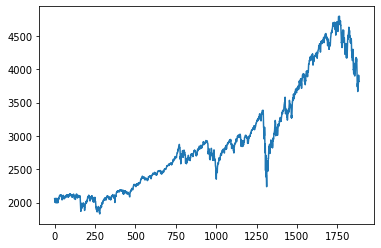

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1881    4251.120305
1882    4245.082207
1883    4238.617908
1884    4230.939609
1885    4224.353511
Name: Close, Length: 1886, dtype: float64

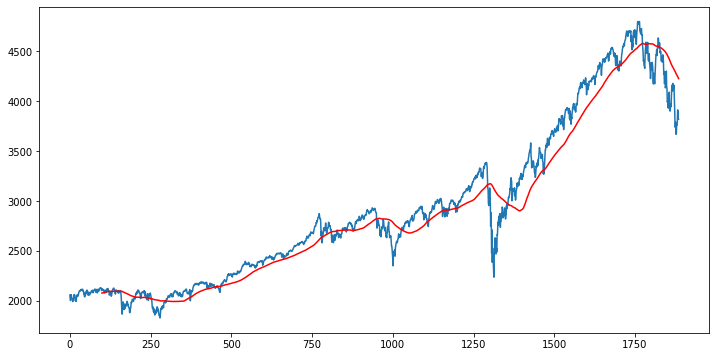

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1881    4409.238343
1882    4406.226694
1883    4403.260846
1884    4400.075696
1885    4396.826196
Name: Close, Length: 1886, dtype: float64

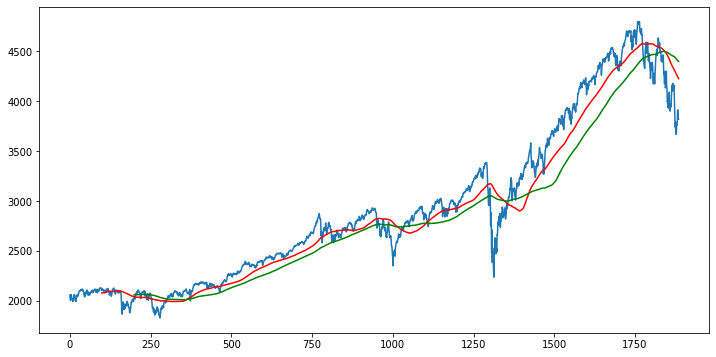

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(1886, 5)

In [ ]:
#splitting the data training and testing 
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1320, 1)
(566, 1)


In [ ]:
data_training.head()

,Close
0,2058.199951
1,2020.579956
2,2002.609985
3,2025.900024
4,2062.139893


In [ ]:
data_testing.head()

,Close
1320,2470.500000
1321,2526.899902
1322,2488.649902
1323,2663.679932
1324,2659.409912


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.14714817],
       [0.12298741],
       [0.11144652],
       ...,
       [0.4575196 ],
       [0.51222487],
       [0.48521271]])

In [ ]:
data_training_array.shape

(1320, 1)

In [ ]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1220, 100, 1)

In [ ]:
#ML model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
39/39 [==============================] - 16s 274ms/step - loss: 0.0614
Epoch 2/50
39/39 [==============================] - 11s 271ms/step - loss: 0.0125
Epoch 3/50
39/39 [==============================] - 11s 279ms/step - loss: 0.0120
Epoch 4/50
39/39 [==============================] - 11s 289ms/step - loss: 0.0101
Epoch 5/50
39/39 [==============================] - 12s 302ms/step - loss: 0.0097
Epoch 6/50
39/39 [==============================] - 11s 275ms/step - loss: 0.0085
Epoch 7/50
39/39 [==============================] - 12s 300ms/step - loss: 0.0092
Epoch 8/50
39/39 [==============================] - 11s 271ms/step - loss: 0.0124
Epoch 9/50
39/39 [==============================] - 11s 273ms/step - loss: 0.0084
Epoch 10/50
39/39 [==============================] - 11s 270ms/step - loss: 0.0074
Epoch 11/50
39/39 [==============================] - 11s 272ms/step - loss: 0.0071
Epoch 12/50
39/39 [==============================] - 11s 274ms/step - loss: 0.0071
Epoch 13/50
3

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1320,2470.500000
1321,2526.899902
1322,2488.649902
1323,2663.679932
1324,2659.409912


In [ ]:
data_training.tail(100)

,Close
1220,3076.780029
1221,3085.179932
1222,3093.080078
1223,3087.010010
1224,3091.840088
...,...
1315,2475.560059
1316,2630.070068
1317,2541.469971
1318,2626.649902


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [ ]:
final_df.head()

,Close
0,3076.780029
1,3085.179932
2,3093.080078
3,3087.010010
4,3091.840088


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.32799046],
       [0.33127275],
       [0.33435976],
       [0.33198786],
       [0.33387523],
       [0.33473487],
       [0.33574686],
       [0.34505854],
       [0.34567205],
       [0.34494911],
       [0.3403695 ],
       [0.33844702],
       [0.34108461],
       [0.35020864],
       [0.35289707],
       [0.35801979],
       [0.3530768 ],
       [0.34248353],
       [0.3344066 ],
       [0.34204976],
       [0.34387454],
       [0.35500319],
       [0.35111521],
       [0.34977104],
       [0.35333075],
       [0.36385771],
       [0.36394758],
       [0.3727981 ],
       [0.37321623],
       [0.37267695],
       [0.37823745],
       [0.38443083],
       [0.38552105],
       [0.38527482],
       [0.39173399],
       [0.39177701],
       [0.38445821],
       [0.38816646],
       [0.39874417],
       [0.38975685],
       [0.39422313],
       [0.39066724],
       [0.39686854],
       [0.40532831],
       [0.40167482],
       [0.41057609],
       [0.40863015],
       [0.411

In [ ]:
input_data.shape

(666, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(566, 100, 1)
(566,)


In [ ]:
#Making prediction
y_predicted = model.predict(x_test)

18/18 [==============================] - 1s 79ms/step


In [ ]:
y_predicted.shape

(566, 1)

In [ ]:
y_test

array([0.09108461, 0.11312305, 0.09817674, 0.16657028, 0.16490176,
       0.2002923 , 0.21585994, 0.20484454, 0.2378359 , 0.21333569,
       0.21966196, 0.24897237, 0.22888759, 0.19504842, 0.21956819,
       0.21897815, 0.23419405, 0.25050409, 0.24460759, 0.27435177,
       0.26377014, 0.2318378 , 0.23653857, 0.24658091, 0.23875802,
       0.25156301, 0.27055757, 0.27070992, 0.24723744, 0.22765285,
       0.24035233, 0.24472874, 0.27997857, 0.26787696, 0.28689498,
       0.27786854, 0.28058035, 0.29477253, 0.31210629, 0.30960551,
       0.31530272, 0.31976509, 0.32956912, 0.34600031, 0.34188958,
       0.37376716, 0.38879551, 0.37894464, 0.37228619, 0.29880904,
       0.31413046, 0.32400871, 0.34673097, 0.342335  , 0.34305793,
       0.33618064, 0.34404264, 0.34929042, 0.31765506, 0.33071791,
       0.30152476, 0.31879212, 0.33717708, 0.34326113, 0.34879025,
       0.36821457, 0.3547727 , 0.364393  , 0.35740246, 0.37029341,
       0.35864112, 0.37517   , 0.38651749, 0.38222311, 0.38580

In [ ]:
y_predicted

array([[0.1519366 ],
       [0.14514562],
       [0.13972819],
       [0.13550258],
       [0.13244328],
       [0.1305675 ],
       [0.12995993],
       [0.13075127],
       [0.13305132],
       [0.13700685],
       [0.14254293],
       [0.14941296],
       [0.15736963],
       [0.16608392],
       [0.1750479 ],
       [0.18382424],
       [0.19207272],
       [0.19957358],
       [0.20625895],
       [0.21207547],
       [0.21710055],
       [0.22141992],
       [0.22505218],
       [0.22809328],
       [0.23062502],
       [0.23273182],
       [0.2344571 ],
       [0.23589724],
       [0.23715815],
       [0.23829682],
       [0.23925546],
       [0.23999168],
       [0.24049947],
       [0.24086976],
       [0.24119332],
       [0.24158809],
       [0.24213654],
       [0.24290848],
       [0.24395132],
       [0.24540395],
       [0.24726929],
       [0.24959151],
       [0.25249207],
       [0.2560118 ],
       [0.2603977 ],
       [0.26568788],
       [0.27171853],
       [0.278

In [ ]:
scaler.scale_

array([0.00039075])

In [ ]:
scale_factor = 1/0.00039075
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

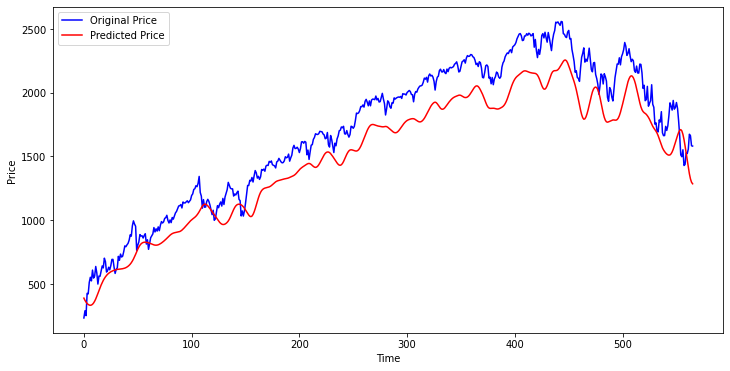

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()